In [16]:
import glob
from chaos.chaos import *

In [17]:
dir1 = './group2/L1521E/'
dir2 = './group2/L1521E_APS/'

In [18]:
line1 = '12C16O'
line2 = '12C17O'
line3 = '12C18O'
line4 = '13C16O'
line5 = '13C17O'
line6 = '13C18O'

file_12C16O = glob.glob(dir2+'*12C16O*')
file_12C17O = glob.glob(dir1+'*12C17O*')
file_12C18O = glob.glob(dir1+'*12C18O*') 
file_13C16O = glob.glob(dir2+'*13C16O*')
file_13C17O = glob.glob(dir1+'*13C17O*')
file_13C18O = glob.glob(dir1+'*13C18O*')

data_12C16O = chaos_pipeline(files = file_12C16O)
data_12C17O = chaos_pipeline(files = file_12C17O)
data_12C18O = chaos_pipeline(files = file_12C18O)
data_13C16O = chaos_pipeline(files = file_13C16O)
data_13C17O = chaos_pipeline(files = file_13C17O)
data_13C18O = chaos_pipeline(files = file_13C18O)

data = [data_12C16O, data_12C17O, data_12C18O, data_13C16O, data_13C17O, data_13C18O]
lines = [line1, line2, line3, line4, line5, line6]

In [19]:
data[2].scan_properties(props=[data[2].line, data[2].obs_date, data[2].lst, data[2].obstime])

0	12C18O(2-1)	2021-03-06T09:56:18.030	 10:58:53.414	360.0	
1	12C18O(2-1)	2021-03-06T13:40:36.960	 03:49:21.006	360.0	
2	12C18O(2-1)	2021-03-06T05:44:13.303	 01:32:37.432	360.0	
3	12C18O(2-1)	2021-03-06T14:01:32.266	 12:28:03.014	360.0	
4	12C18O(2-1)	2021-03-06T05:44:13.303	 01:32:37.432	360.0	
5	12C18O(2-1)	2021-03-06T15:54:44.982	 01:00:16.296	360.0	
6	12C18O(2-1)	2021-03-06T09:56:18.030	 10:58:53.414	360.0	
7	12C18O(2-1)	2021-03-06T13:40:36.960	 03:49:21.006	360.0	
8	12C18O(2-1)	2021-03-06T21:10:29.833	 11:49:58.256	360.0	
9	12C18O(2-1)	2021-03-06T04:45:38.885	 11:24:25.025	360.0	
10	12C18O(2-1)	2021-03-06T04:45:38.885	 11:24:25.025	360.0	
11	12C18O(2-1)	2021-03-06T12:59:12.133	 06:06:11.655	360.0	
12	12C18O(2-1)	2021-03-06T09:05:19.340	 04:36:35.698	360.0	
13	12C18O(2-1)	2021-03-06T09:05:19.340	 04:36:35.698	360.0	
14	12C18O(2-1)	2021-03-06T02:09:14.062	 05:53:08.782	360.0	
15	12C18O(2-1)	2021-03-06T02:09:14.062	 05:53:08.782	360.0	
16	12C18O(2-1)	2021-03-06T23:01:25.039	 00:19:53.6

12C16O


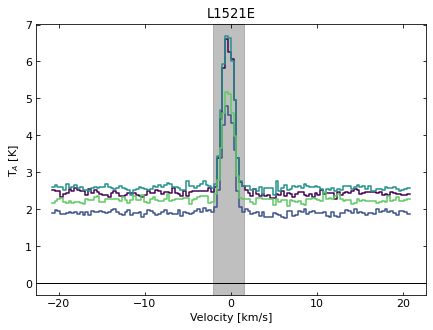

12C17O


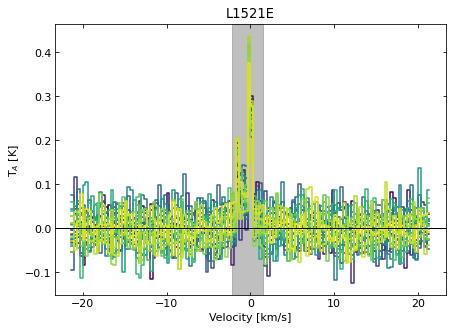

12C18O


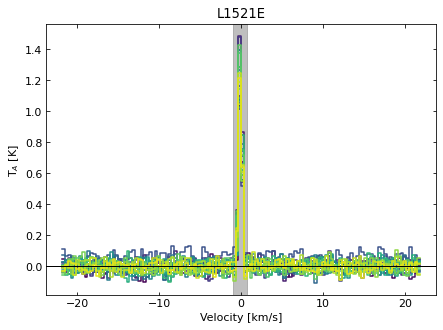

13C16O


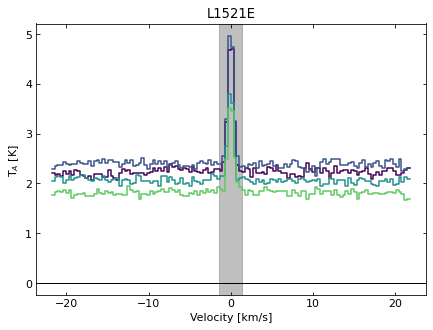

13C17O


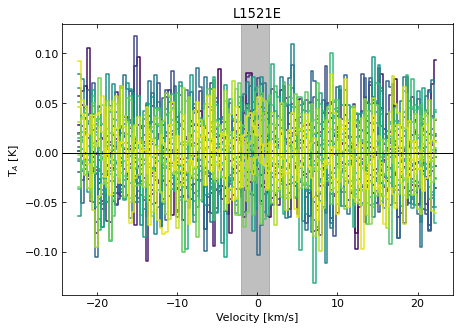

13C18O


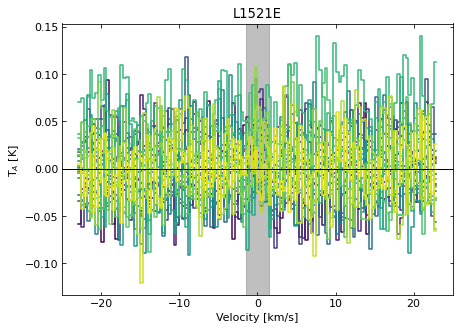

In [20]:
data_12C16O.set_mask(-2.1, 1.5, unit = 'dv')
data_13C16O.set_mask(-1.4, 1.4, unit = 'dv')
data_12C17O.set_mask(-2.2, 1.5, unit = 'dv')
data_13C17O.set_mask(-2, 1.5, unit = 'dv')
data_12C18O.set_mask(-1, 0.7, unit = 'dv')
data_13C18O.set_mask(-1.5, 1.5, unit = 'dv')

for obj,line in zip(data,lines):
    print(line)
    obj.plot_specs(xunits='dv', showmask=True)

12C16O


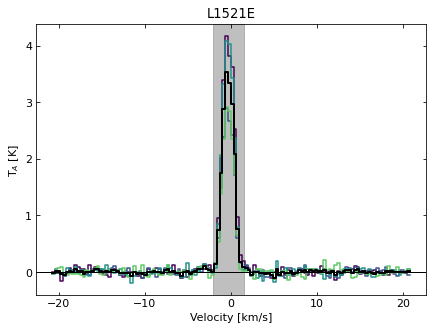

12C17O


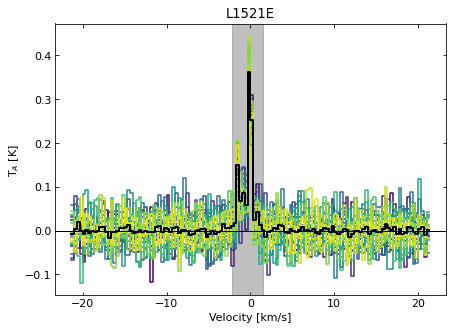

12C18O


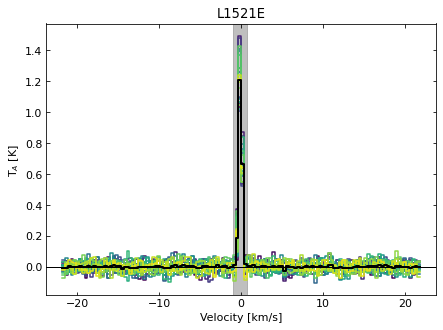

13C16O


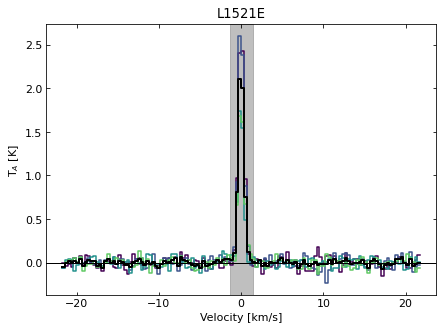

13C17O


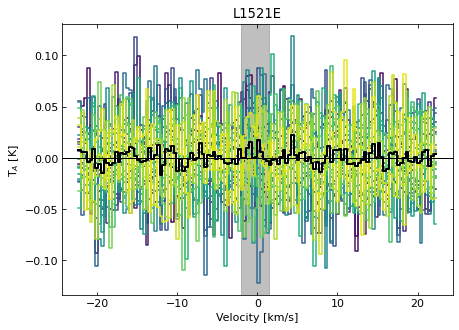

13C18O


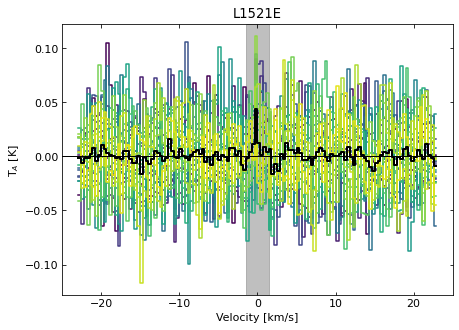

In [21]:
for obj,line in zip(data,lines):
    obj.baseline_fit(degree=5)
    obj.baseline_remove()
    obj.combined_spec_stack(weights='tsys')
    print(line)
    obj.plot_specs(xunits='dv', showmask=True)

In [22]:
for obj in data:
    obj.combined_spec_rms()

In [28]:
print('12C16O:')
data_12C16O.integrate_spec(-2.1, 1.5, unit = 'dv', yunit='TA')
print('13C16O:')
data_13C16O.integrate_spec(-1.4, 1.4, unit = 'dv', yunit='TA')
print('12C17O:')
data_12C17O.integrate_spec(-2.2, 1.5, unit = 'dv', yunit='TA')
print('13C17O:')
data_13C17O.integrate_spec(-2, 1.5, unit = 'dv', yunit='TA')
print('12C18O:')
data_12C18O.integrate_spec(-1, 0.7, unit = 'dv', yunit='TA')
print('13C18O:')
data_13C18O.integrate_spec(-1.5, 1.5, unit = 'dv', yunit='TA')

12C16O:
Integrated Flux: 6.033178381104538 +/- 0.03460085613962369 K km/s, SNR: 174.36500289932286
13C16O:
Integrated Flux: 2.0894570875723417 +/- 0.0288286891680435 K km/s, SNR: 72.47839384554804
12C17O:
Integrated Flux: 0.3631928992381482 +/- 0.007083011082541995 K km/s, SNR: 51.276624447664034
13C17O:
Integrated Flux: 0.014791841107531753 +/- 0.007752079243357115 K km/s, SNR: 1.9081127324913671
12C18O:
Integrated Flux: 0.7057519773630981 +/- 0.0044625628852329735 K km/s, SNR: 158.1494749796122
13C18O:
Integrated Flux: 0.031177412982533112 +/- 0.006157666519867272 K km/s, SNR: 5.0631863355934295


In [34]:
C12O16 = [6.033178381104538, 0.03460085613962369, 3.6]
C13O16 = [2.0894570875723417, 0.0288286891680435, 2.8]
C12O17 = [0.3631928992381482, 0.007083011082541995, 3.7]
C13O17 = [0.014791841107531753, 0.007752079243357115, 3.5]
C12O18 = [0.7057519773630981, 0.0044625628852329735, 1.7]
C13O18 = [0.031177412982533112, 0.006157666519867272, 3.0]

In [35]:
import numpy as np
def ratio(line1, line2):
    r = (line1[0] * line2[2])/ (line2[0] * line1[2])
    sigma = np.sqrt((r**2) * ((line1[1]/line1[0])**2 + (line2[1]/line2[0])**2))
    return r, sigma

In [36]:
print('16O/17O')
print()
r, sigma = ratio(C12O16, C12O17)
print('12C16O/12C17O:', r, sigma)
r, sigma = ratio(C13O16, C13O17)
print('13C16O/13C17O:', r, sigma)

16O/17O

12C16O/12C17O: 17.07292924084032 0.3470560831909007
13C16O/13C17O: 176.571756042967 92.5694444984184


In [37]:
print('16O/18O')
print()
r, sigma = ratio(C12O16, C12O18)
print('12C16O/12C18O:', r, sigma)
r, sigma = ratio(C13O16, C13O18)
print('13C16O/13C18O:', r, sigma)

16O/18O

12C16O/12C18O: 4.036830208868814 0.034460753301478096
13C16O/13C18O: 71.80531699833956 14.216406102523282


In [38]:
print('12C/13O')
print()
r, sigma = ratio(C12O16, C13O16)
print('12C16O/13C16O:', r, sigma)
r, sigma = ratio(C12O17, C13O17)
print('12C17O/13C17O:', r, sigma)
r, sigma = ratio(C12O18, C13O18)
print('12C18O/13C18O:', r, sigma)

12C/13O

12C16O/13C16O: 2.245785329644849 0.03355585618725746
12C17O/13C17O: 23.226375143777428 12.180858324496818
12C18O/13C18O: 39.94701762563267 7.89374161550892


In [81]:
c12c13 = [39.94701762563267, 7.89374161550892]
o16o17 = [176.571756042967, 92.5694444984184]
o16o18 = [71.80531699833956, 14.216406102523282]
x = ['$\\frac{^{12}C}{^{13}C}$', '$\\frac{^{16}O}{^{17}O}$', '$\\frac{^{16}O}{^{18}O}$']
y = [c12c13[0], o16o17[0], o16o18[0]]
yerror = [c12c13[1], o16o17[1], o16o18[1]]

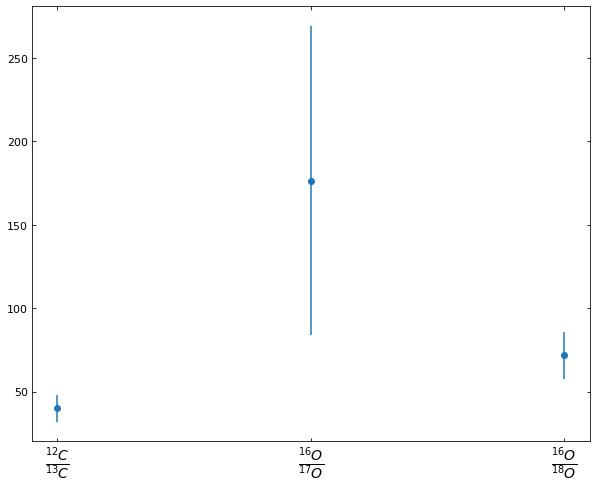

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.errorbar(x,y,yerr=yerror, fmt='o')
ax.set_xticks(np.arange(len(y)))
ax.set_xticklabels(x, size=20)
ax.set_title()
plt.savefig('results.png', dpi = 500)